# Bandpass filter

In [4]:
from matplotlib import pyplot as plt
import IPython.display
%matplotlib inline

In [5]:
""" Basic I/O """
import soundfile as sf
import wave


def load_audio_sf(file_path):
    signal, frame_rate = sf.read(file_path)
    wave_file = wave.open(file_path, 'r')
    return signal, frame_rate, wave_file.getsampwidth()

def export_audio_sf(file_path, wave, frame_rate):
    sf.write(file_path, wave, frame_rate)

## Bandpass filter

In [11]:
from scipy.signal import butter, lfilter


def butter_bandpass(fs: float,
                    lowcut: float = None,
                    highcut: float = None,
                    order: int = 5):
    """ Filter coefficient
    - Bandpass (lowcut < frequency < highcut)
    - Lowpass (frequency < lowcut)
    - Hihgpass (highcut < frequency)


     Parameter
    ------------
    fs: float
        sampling frequency
    lowcut: float
        cut off frequency (low)
    highcut: float
        cut off frequency (high)

     Return
    ------------
    filter coefficient a
    filter coefficient b
    """
    nyq = 0.5 * fs
    if lowcut is None and highcut is None:
        return None
    elif lowcut is None and highcut is not None:
        cutoff = highcut / nyq
        [b, a] = butter(order, [cutoff], btype='high')
    elif lowcut is not None and highcut is None:
        cutoff = lowcut / nyq
        [b, a] = butter(order, [cutoff], btype='low')
    else:
        low = lowcut / nyq
        high = highcut / nyq
        [b, a] = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data,
                           fs: int,
                           lowcut: float = None,
                           highcut: float = None,
                           order: int = 5,
                           return_filter: bool=False):

    """ Bandpass filter

    - Bandpass (lowcut < frequency < highcut)
    - Lowpass (frequency < lowcut)
    - Hihgpass (highcut < frequency)

     Parameter
    ------------------
    data:
        target data
    fs: float
        sampling frequency
    lowcut: float
        cut off frequency (low)
    highcut: float
        cut off frequency (high)
    order: int
        filter order

     Return
    ------------------
    filtered signal
    """
    [b, a] = butter_bandpass(fs, lowcut, highcut, order)
    y = lfilter(b, a, data)
    if return_filter:
        return y, [b, a]
    else:
        return y

In [42]:
from scipy.signal import freqz


def filter_plot(file_path, export_path):
    signal, frame_rate, sample_width = load_audio_sf(file_path)

    # run band pass filter
    order = 6
    lowcut=500
    highcut=2000
    signal_denoised = butter_bandpass_filter(signal, fs=frame_rate, lowcut=lowcut, highcut=highcut, order=order)
    
    # export audio
    export_audio_sf(export_path, signal_denoised, frame_rate)

    # Plot the frequency response for a few different orders.
    plt.figure()
    plt.grid()
    plt.title('Frequency response')
    for o in [order-3, order, order+3]:
        b, a = butter_bandpass(fs=frame_rate, lowcut=lowcut, highcut=highcut, order=o)
        w, h = freqz(b, a, worN=2000)
        plt.plot((frame_rate * 0.5 / np.pi) * w, abs(h), label="order = %d" % o)

    plt.plot([0, 0.5 * frame_rate], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.legend(loc='best')
    plt.xlim([0, int(0.5 * frame_rate)])

    # Filter a noisy signal
    plt.figure(figsize=(6, 4))
    plt.title('Wave signal (%0.1f Hz)' % frame_rate)
    plt.grid()
    plt.plot(signal, label='raw signal')
    plt.plot(signal_denoised, label='filtered signal')
    # setup ticks
    interval = 10
    length_sec = int(len(signal)/frame_rate) + 1
    interval = min(10, length_sec)
    ind_1 = np.arange(0, length_sec+1, int(length_sec/interval))
    ind_2 = ind_1 * frame_rate
    plt.xticks(ind_2, ind_1)
    plt.xlim([0, len(signal)])
    plt.xlabel("Time (sec.): total %0.2f" % (len(signal)/frame_rate))
    plt.ylabel("Amplitude")
    plt.legend(loc='best')
    plt.show()

## Test

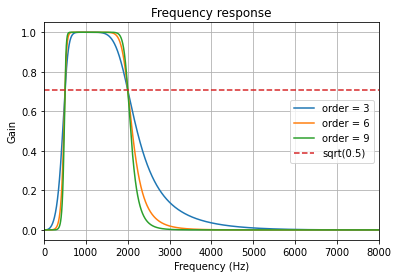

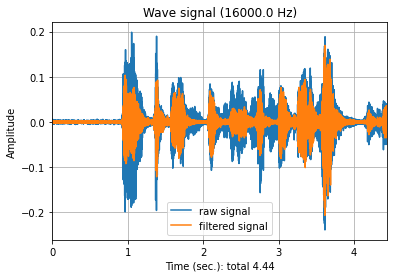

In [43]:
audio_file = '../../sample_data/vc_6.wav'
audio_file_export = '../../sample_data/vc_6_bandpass.wav'
filter_plot(audio_file, audio_file_export)
IPython.display.Audio(audio_file)

In [44]:
IPython.display.Audio(audio_file_export)

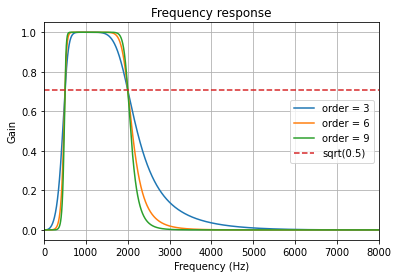

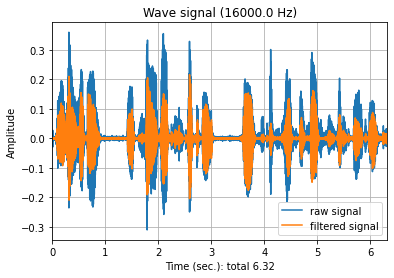

In [45]:
audio_file = '../../sample_data/vc_3.wav'
audio_file_export = '../../sample_data/vc_3_bandpass.wav'
filter_plot(audio_file, audio_file_export)
IPython.display.Audio(audio_file)

In [46]:
IPython.display.Audio(audio_file_export)